# Visualization

We here briefly present a few solutions that will allow you to quickly visualize different types of images. We present both 2D and nD solutions. While of course you can visualize 2D images using nD capable packages, pure 2D solutions are often much more lightweight and simple to use.

## Matplotlib

Matplotlib is one of the oldest Python packages and a general purpose plotting library. It serves as a basis for several other packages dedicated to custom tasks that are easier to use but it is essential to understand the basics of it. We will learn later one about the general usage for plotting of Matplotlib and its family of packages. Here we focus on the ```imshow``` function which allows to display 2D images.

For this we need to import the ```pyplot``` submodule of Matplotlib:

In [1]:
import matplotlib.pyplot as plt

We also import an image to display:

In [2]:
import skimage

image = skimage.io.imread('../data/coli_nucl_ori_ter_raw.tif')

In [3]:
image.shape

(30, 220, 169, 3)

Matplotlib only knows how to disaply 2D images, so we have to extract single plane images from our large stack:

In [4]:
myimage_ch1 = image[0,:,:,0]
myimage_ch2 = image[0,:,:,1]

### The ```imshow``` function

Now we can use the ```imshow``` function which takes as input a single 2D array:

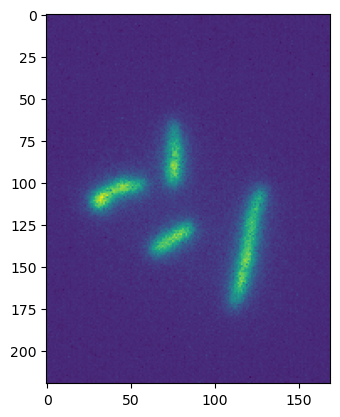

In [5]:
plt.imshow(myimage_ch1);

By default the colormap is viridis, which is not optimal for microscopy. There are many options that one can pass to ```imshow```, one of them allows us to pick a color map:

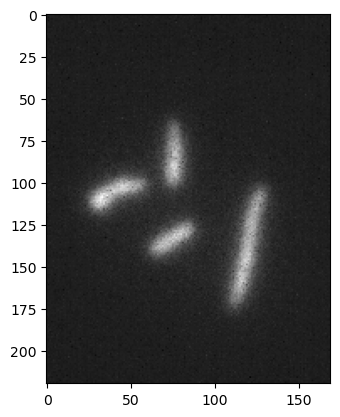

In [6]:
plt.imshow(myimage_ch1, cmap='gray');

### The figure and axis

As you can see above, some default choices are mode for us: size of figure, presence of tick marks etc. If we want to have more control over the figure, instead of creating it at the same time as displaying the image, we need to create it *first* and then fill it For this we can use the ```subplots``` function:

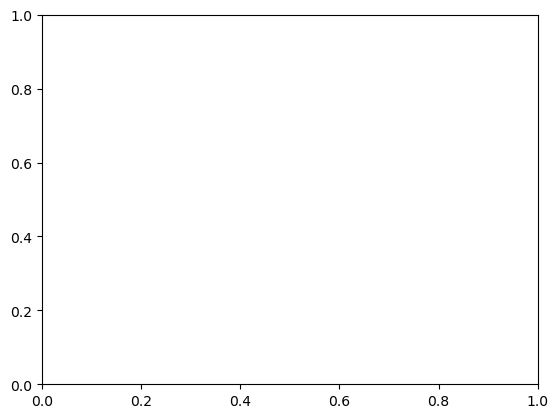

In [7]:
fig, ax = plt.subplots()

As you can see, the above commmand ```plt.subplots()``` creates an empty figure and returns two objects: ```fig``` and ```ax```. ```fig``` is the *entire figure* which potentially could contain multiple parts. The ```ax``` variable represents the plot itself. Now instead of using ```plt.imshow``` we can use ```ax.imshow``` and finely control the rendering:

Text(10, 20, 'A')

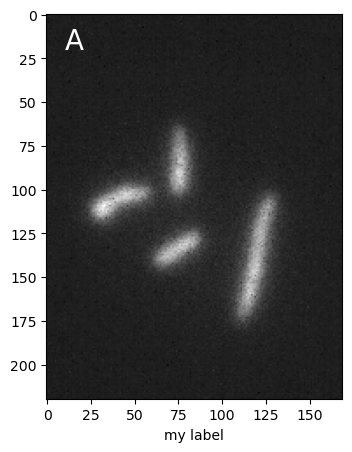

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(myimage_ch1, cmap='gray');
ax.set_xlabel('my label');
ax.text(x=10, y=20, s='A', fontdict={'color': 'white', 'size':20})

Above we have used:
- an optional parameter ```figsize``` with which we can set the size of the figure
- used ```ax.text``` to add a text label to the image
- added an axis label using the ```set_xlabel``` method on ```ax```

There is much more one can do with Matplotlib and we will see some of those possibilities during the course.

### Grids

If we want to display multiple images, like our two channels here, we can also create a grid of plots by telling the ```subplots``` function how many rows and columns we want:

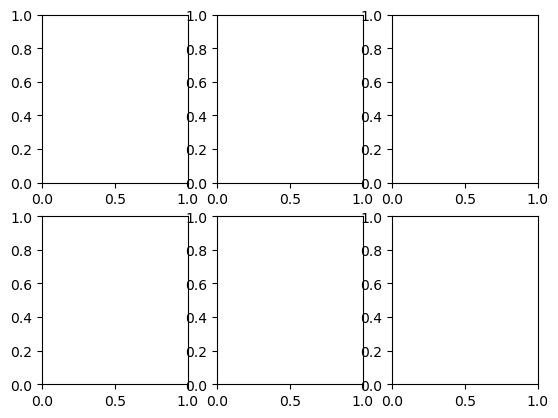

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3)

Now the ```axes``` object is also an array of 2x3 where each element is a normal axis object that we can use to plot. For example if we want to insert an image on the second row, third columns we can write:

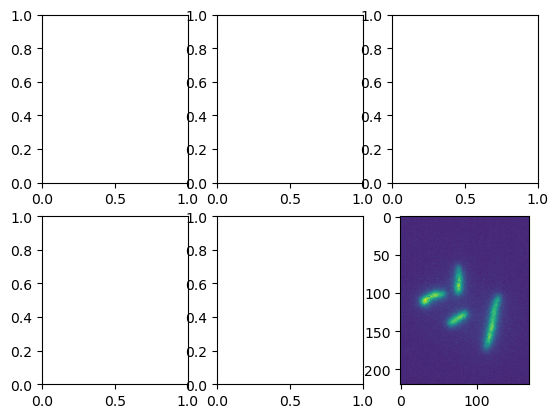

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3)
axes[1,2].imshow(myimage_ch1);

### Limitations

Matplotlib has not been designed with microscopy as focus. It is a general purpose library. While you can adjust every single element of the plots so that you can show your microscopy images exactly as you wish, it requires a considerable amount of code. For that reason, I have developed the ```microfilm``` package, based on Matplotlib, that greatly simplifies this.

## Histogram

Besides ```imshow```, one other function that is helpful to quickly explore an image is the ```plt.hist``` which allows us to create a pixel histogram. This typically allows to check whether an image is e.g. saturated, properly uses the available range of values etc. The most common option to use here is ```bins``` with which you can set the position and width of bins (we'll see later about the function ```np.ravel```):

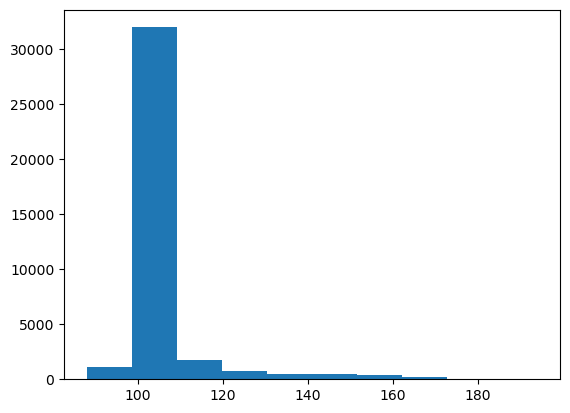

In [11]:
import numpy as np
plt.hist(np.ravel(myimage_ch1));

## Microfilm

Mirofilm is entirely based on Matplotlib but focuses on microscopy. For example it provides an easy way to show multi-channel images *à la Fiji* in a composite format. We first load the main plotting function:

In [12]:
from microfilm.microplot import microshow

The ```microshow``` function is very similar to ```imshow```. The difference is that it takes a list of images as input (or an array where the first dimensions represents channels, and offers a large set of options for customization. Let's try with the two channels:

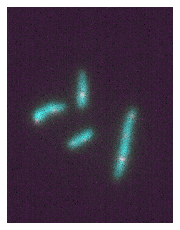

In [13]:
microim = microshow(images=[myimage_ch1, myimage_ch2])

By default, ```microshow``` produces a composite image with reasonable colormaps defaults. Many options allows us to customize the plot and we have already seen a few:

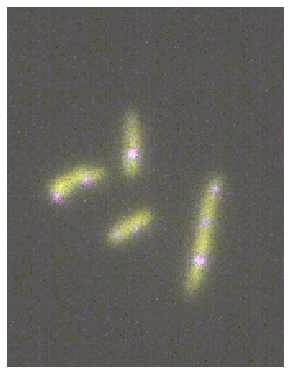

In [14]:
microim = microshow(
    images=[myimage_ch1, myimage_ch2],
    fig_scaling=5,
    cmaps=['pure_yellow', 'pure_magenta'],limits=[[50,200],[90,120]]
)

In the example above, we have:
- made the figure larger using ```fig_scaling```
- chosen other color maps using ```cmaps```
- added intensity limits for the color scale with ```limits```

And finally the output ```microim``` object can also be manipulated. For example we can use a method to add a scale bar:

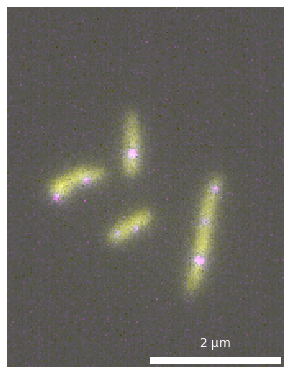

In [15]:
microim.add_scalebar(
    unit='um', scalebar_size_in_units=2,
    scalebar_unit_per_pix=0.025)

microim.fig

## napari

napari is a recent package developed specifically to handle nD images. It is quite different from standard packages as it provides a separate GUI that does not integrate in the notebook. We will learn much more about napari in a specifically dedicated course part. Here we just show how to display nD images.

**Note**: napari might not be setup by default in your environment. You can try to add it in this notebook using:

```
!mamba install -c conda-forge napari pyqt -y
```
if you have mamba installed, otherwise with conda:
```
!conda install -c conda-forge napari pyqt -y
```

In [16]:
import napari

from napari.utils.notebook_display import nbscreenshot

The first task is to create a viewer:

In [17]:
viewer = napari.Viewer()

Now we can add images to the viewer. For example we can add one channel of our large stack. Note that we keep the z-stacks and time points:

In [18]:
image.shape

(30, 220, 169, 3)

In [19]:
viewer.add_image(image[:,:,:,0], colormap='magenta');

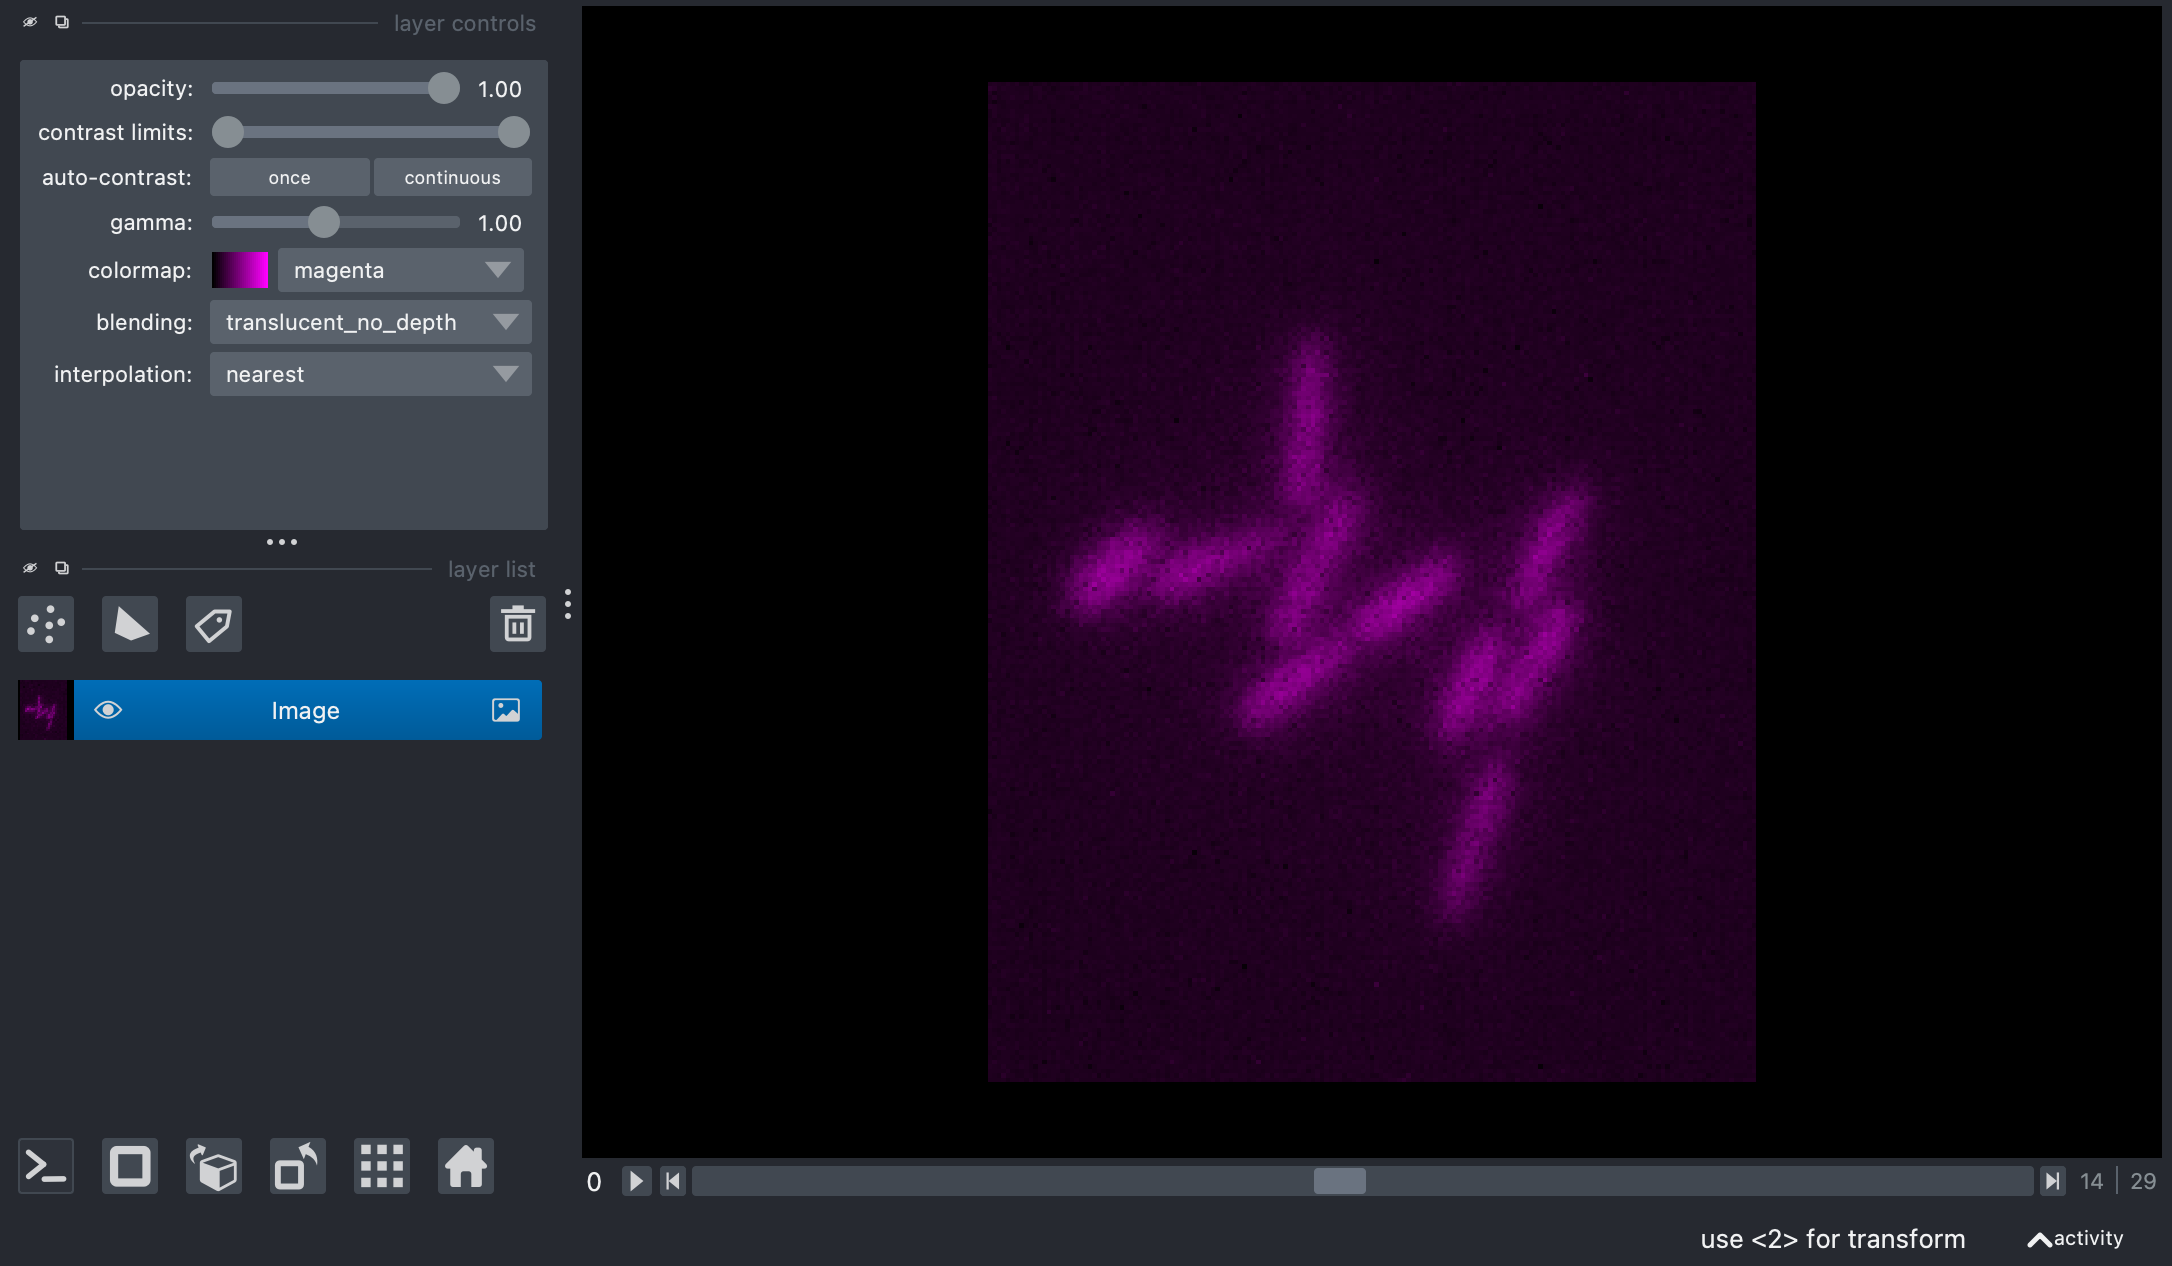

In [20]:
nbscreenshot(viewer)

As you can see above, we obtain now a browsable view of our dataset with sliders dedicated to brows through stacks and time, and a small menu to adjust colormaps, brightness etc.

## Exercise

1. Import the image ```20180209_mitoBFP_Drp1GFP_KDEL-RFP.lif```
2. Plot the first time point using ```microshow``` (all three channels)
3. Plot the entire dataset using napari